# Clustering

## Marcin Biela, 302959

In [147]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt

help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [148]:
# Create a dataset using make_blobs
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

In [149]:
# printing shapes of features X and aim variable y
print(X.shape)
print(y.shape)

(120, 2)
(120,)


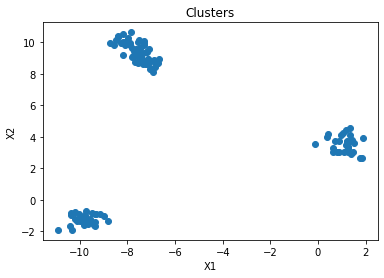

In [150]:
# Plotting clusters

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_title("Clusters")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [151]:
# Kmeans for 4 clusters and random init method
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, init='random').fit(X, y)
print(kmeans.labels_)

[2 1 0 2 2 3 2 0 0 0 0 3 1 2 1 1 2 0 0 1 2 2 2 2 0 0 0 1 1 2 2 3 1 0 0 3 3
 3 2 2 1 2 3 2 0 0 3 3 1 1 1 3 3 3 3 1 1 3 3 2 3 0 0 0 1 3 2 3 3 0 2 2 3 0
 3 0 0 0 1 1 3 2 0 2 3 0 3 2 1 2 2 3 1 1 2 3 0 1 3 0 1 2 0 1 1 1 2 1 2 1 1
 1 1 2 3 3 2 2 3 0]


In [152]:
# Predict kmeans
model_predict_1 = kmeans.predict(X)

In [153]:
# calculate cluster centers
cluster_centers_1 = kmeans.cluster_centers_
print(cluster_centers_1)

[[-7.93049367  9.95040112]
 [-9.765425   -1.24419081]
 [-7.23892755  8.888012  ]
 [ 1.11986306  3.54672068]]


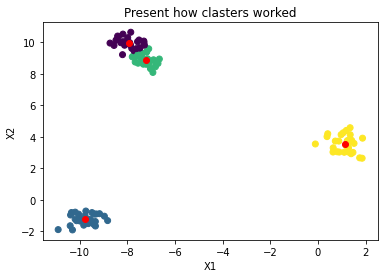

In [154]:
# Ploting a clusters with their centeres
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=model_predict_1)
# cluster_centers
ax.scatter(cluster_centers_1[:, 0], cluster_centers_1[:, 1], color='red')
ax.set_title("Present how clasters worked")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [155]:
# calculate inertia
kmeans.inertia_

36.884605908535214

## Kmeans clustering - example II

In [156]:
def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.5, length_includes_head=True)


In [157]:
# Creating a dataset, 350 samples, 2 features, 5 centers
X_2, y_2 = make_blobs(n_samples=350, n_features=2, centers=5, cluster_std=0.8)

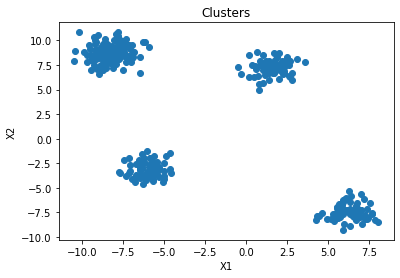

In [158]:
# ploting clusters
fig, ax = plt.subplots()
ax.scatter(X_2[:, 0], X_2[:, 1])
ax.set_title("Clusters")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [159]:
# Kmeans for this example
kmeans_2 = KMeans(n_clusters=5, init='random').fit(X_2, y_2)
print(kmeans_2.labels_)

[3 1 0 0 4 0 3 4 4 3 0 3 2 3 2 1 2 4 2 0 3 2 0 0 3 4 4 0 3 3 0 1 4 0 2 2 4
 4 1 1 0 3 3 2 2 0 4 2 2 1 0 1 1 0 4 2 2 0 3 0 2 2 4 2 4 2 3 0 2 1 1 0 1 1
 3 2 0 0 1 0 0 0 2 4 4 3 1 3 0 4 1 2 1 1 2 2 1 2 4 0 4 0 2 3 2 4 1 0 1 3 0
 1 2 4 4 3 1 4 1 4 1 0 0 0 1 1 4 2 1 2 3 3 4 1 2 2 4 3 1 0 0 1 2 3 4 2 0 0
 3 2 1 2 2 4 4 1 0 2 3 4 1 3 0 4 2 1 3 1 0 1 4 3 2 3 4 0 3 1 4 2 2 4 1 3 1
 0 2 3 0 4 2 3 0 1 0 4 2 4 0 0 2 4 3 0 1 2 0 0 0 4 0 4 0 2 0 4 1 3 4 1 3 0
 4 3 3 3 4 1 3 3 2 4 4 1 4 0 4 0 3 1 4 0 2 3 2 3 1 1 0 1 4 1 3 2 2 1 0 2 1
 0 3 2 1 1 0 1 3 1 4 2 1 2 4 0 3 1 1 2 3 1 2 2 0 4 3 2 3 0 4 3 3 4 0 0 2 3
 4 0 1 2 0 4 2 4 4 4 3 2 2 1 1 4 0 3 3 0 0 0 1 0 4 0 3 4 2 4 3 3 0 4 4 3 0
 4 2 1 1 1 3 0 2 1 0 2 1 3 2 4 4 1]


In [160]:
# calculate cluster_centeres
cluster_centers_2 = kmeans_2.cluster_centers_
print(cluster_centers_2)

[[-7.85818294  9.32566205]
 [-6.04376099 -3.11416762]
 [ 1.58557479  7.21457172]
 [-8.72937153  8.13140389]
 [ 6.30429758 -7.46708395]]


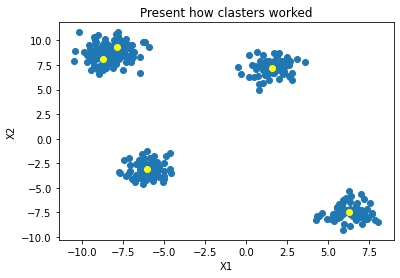

In [161]:
# Ploting a clusters with their centeres
fig, ax = plt.subplots()
ax.scatter(X_2[:, 0], X_2[:, 1])
# cluster_centers
ax.scatter(cluster_centers_2[:, 0], cluster_centers_2[:, 1], color='yellow')
ax.set_title("Present how clasters worked")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [162]:
# calculate inertia
kmeans_2.inertia_

393.60213330002057

K-means++


In [163]:
kmeans_pp = KMeans(n_clusters=5, init='k-means++').fit(X_2, y_2)
model_predict = kmeans_pp.predict(X_2)
print(model_predict)

[2 1 4 4 3 4 2 3 3 2 2 2 0 2 0 1 0 3 0 4 2 0 2 2 2 3 3 4 2 2 4 1 3 4 0 0 3
 3 1 1 2 2 2 0 0 4 3 0 0 1 4 1 1 4 3 0 0 4 2 4 0 0 3 0 3 0 2 4 0 1 1 4 1 1
 2 0 4 4 1 2 4 4 0 3 3 2 1 2 4 3 1 0 1 1 0 0 1 0 3 2 3 4 0 2 0 3 1 2 1 2 4
 1 0 3 3 2 1 3 1 3 1 4 4 4 1 1 3 0 1 0 2 2 3 1 0 0 3 2 1 2 4 1 0 2 3 0 4 4
 2 0 1 0 0 3 3 1 2 0 2 3 1 2 2 3 0 1 2 1 4 1 3 2 0 2 3 2 2 1 3 0 0 3 1 2 1
 4 0 2 2 3 0 2 4 1 4 3 0 3 4 4 0 3 2 4 1 0 4 4 4 3 4 3 4 0 4 3 1 2 3 1 2 4
 3 2 2 4 3 1 2 2 0 3 3 1 3 4 3 4 2 1 3 4 0 2 0 2 1 1 4 1 3 1 2 0 0 1 4 0 1
 4 2 0 1 1 4 1 2 1 3 0 1 0 3 4 2 1 1 0 2 1 0 0 2 3 2 0 2 4 3 2 2 3 4 2 0 2
 3 4 1 0 4 3 0 3 3 3 2 0 0 1 1 3 4 2 2 4 2 4 1 4 3 2 2 3 0 3 2 2 4 3 3 2 4
 3 0 1 1 1 2 2 0 1 4 0 1 2 0 3 3 1]


In [164]:
# calculate inertia
kmeans_pp.inertia_

393.50256153440927

Elbow method

In [165]:
# creating a inertia history by calculation KMeans for different cluster number
cluster_range_list = [i for i in range(1, 14)]
inertia_history = []

for e in cluster_range_list:
  model_elbow = KMeans(n_clusters=e, init='k-means++')
  model_elbow.fit(X_2, y_2)
  inertia_history.append(model_elbow.inertia_)

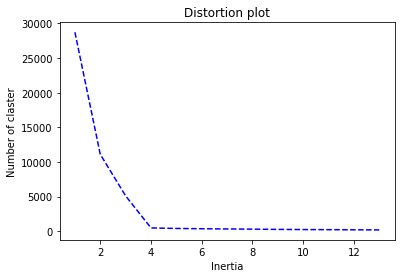

In [166]:
# Plot showing how numbers of clusters are depended on intertia
fig, ax = plt.subplots()
ax.plot(cluster_range_list, inertia_history, 'b--')
ax.set_title("Distortion plot")
ax.set_xlabel("Inertia")
ax.set_ylabel("Number of claster")
plt.show()

Distortion of K-Means

In [167]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd

# Creating a dataset using make_moons
X, y = make_moons(1000, noise=.05, random_state=0)

X_moon = pd.DataFrame(X, columns=['f1', 'f2'])

#TODO: KMeans
moons_KMeans_model = KMeans(init='k-means++', n_clusters=2)
moons_KMeans_model.fit(X, y)
y_moons_kmeans_predict = moons_KMeans_model.predict(X)
moons_centers = moons_KMeans_model.cluster_centers_

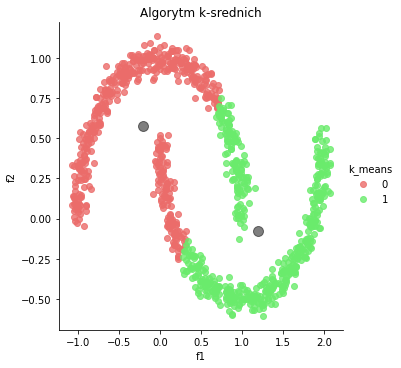

In [168]:
# Plot
X_moon['k_means'] = y_moons_kmeans_predict
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(moons_centers[:, 0], moons_centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

# Clustering II - hierarchical methods

In [169]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

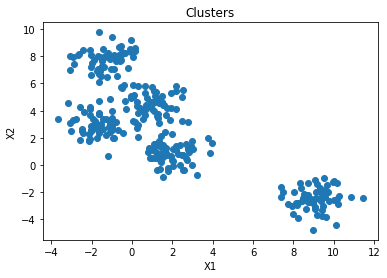

In [170]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_title("Clusters")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [171]:
# Kmeans
model = KMeans(init='random', n_clusters=2)
model.fit(X, y_true)
model_predict = model.predict(X)
print(model_predict)

[1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0]


In [172]:
cluster_centers_3 = model.cluster_centers_

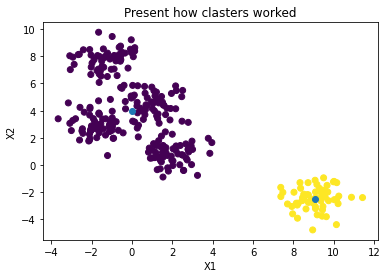

In [173]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=model_predict)
# cluster_centers
ax.scatter(cluster_centers_3[:, 0], cluster_centers_3[:, 1])
ax.set_title("Present how clasters worked")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

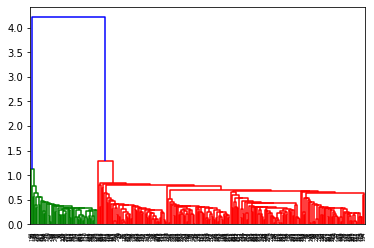

In [174]:
# Dendograms
from scipy.cluster.hierarchy import dendrogram, linkage
Linkage_X = linkage(X)
Dendrogram_X = dendrogram(Linkage_X)

In [175]:
# Dendrogram for smaller dataset

X, y_true = make_blobs(n_samples=30, centers=4, cluster_std=0.7, random_state=0)

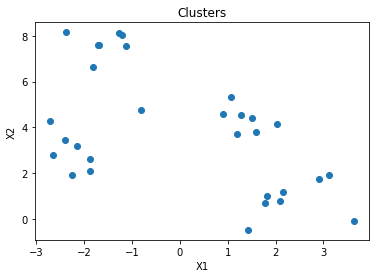

In [176]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_title("Clusters")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

In [177]:
# KMeans
model = KMeans(init='random', n_clusters=2)
model.fit(X, y_true)
model_predict = model.predict(X)

In [178]:
cluster_centers_3 = model.cluster_centers_

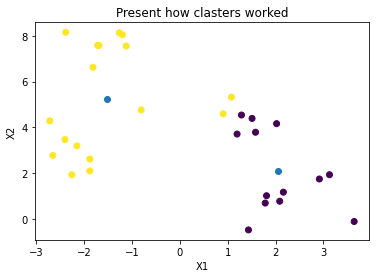

In [179]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=model_predict)
# cluster_centers
ax.scatter(cluster_centers_3[:, 0], cluster_centers_3[:, 1])
ax.set_title("Present how clasters worked")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

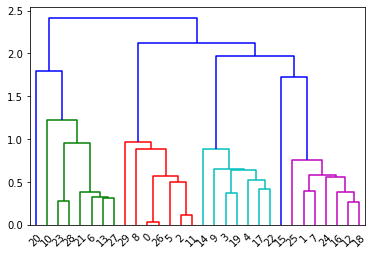

In [180]:
Linkage_X = linkage(X)
Dendrogram_X = dendrogram(Linkage_X)

Agglomeratice clustering

In [181]:
data = pd.read_csv("https://raw.githubusercontent.com/Marcin279/Machine_Learning/main/lab6_clustering/shopping_data.csv", sep=',')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [182]:
# Extract necessery features for further analysis
data = data[["Annual Income (k$)", "Spending Score (1-100)"]]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In that part of analysis we are going to focused on compare methods using dendrograms

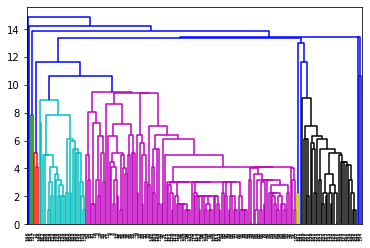

In [183]:
# Single linkage method
single_linkage_method = linkage(data, method='single')
dengdro_single = dendrogram(single_linkage_method)

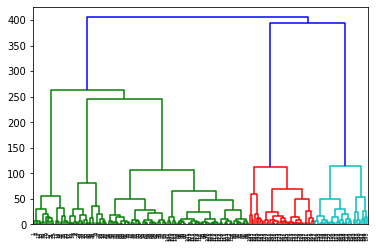

In [184]:
# Ward method
ward_method = linkage(data, method='ward')
dengdro_ward = dendrogram(ward_method)

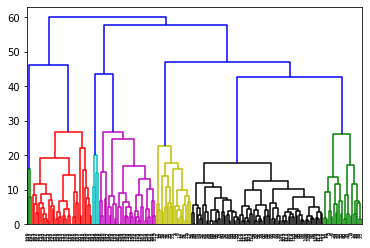

In [185]:
# Average method
average_method = linkage(data, method='average')
dengdro_average = dendrogram(average_method)

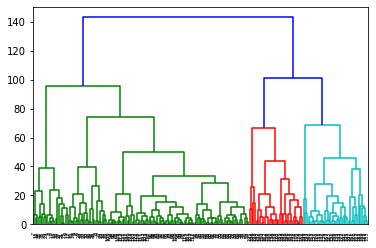

In [186]:
# complete linkage
complete_method = linkage(data, method='complete')
dengdro_complete = dendrogram(complete_method)

Comparison result in case of method used, we are also focused on number clusters

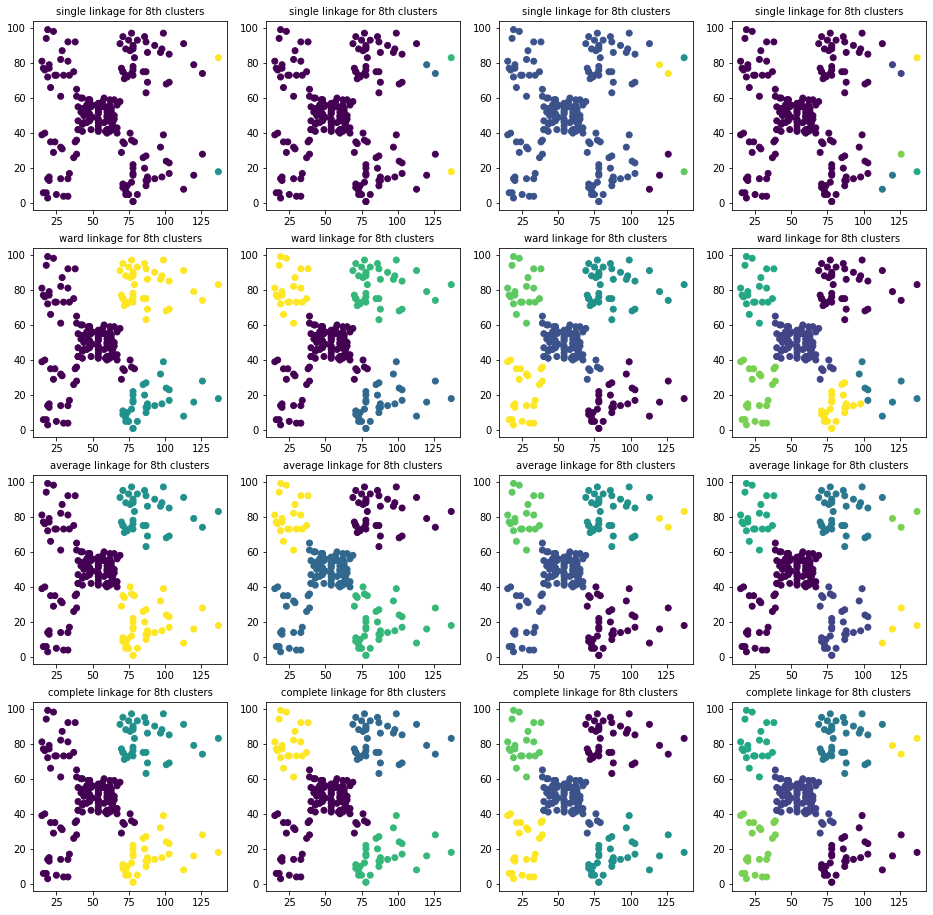

In [187]:
from sklearn.cluster import AgglomerativeClustering
data = np.array(data)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
cluster_methods = ['single', 'ward', 'average', 'complete']
n_plot = 1
for method in cluster_methods:
    for n_cluster in range(3, 7):
        agg_clust = AgglomerativeClustering(n_clusters=n_cluster,
                                            linkage=method).fit(data)
        plt.subplot(4, 4, n_plot)
        plt.scatter(data[:, 0], data[:, 1], c=agg_clust.labels_)
        plt.title(f'{method} linkage for {n}th clusters', size=10)
        n_plot += 1

# Selecting the number of clusters with silhouette analysis on KMeans clustering

In [188]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


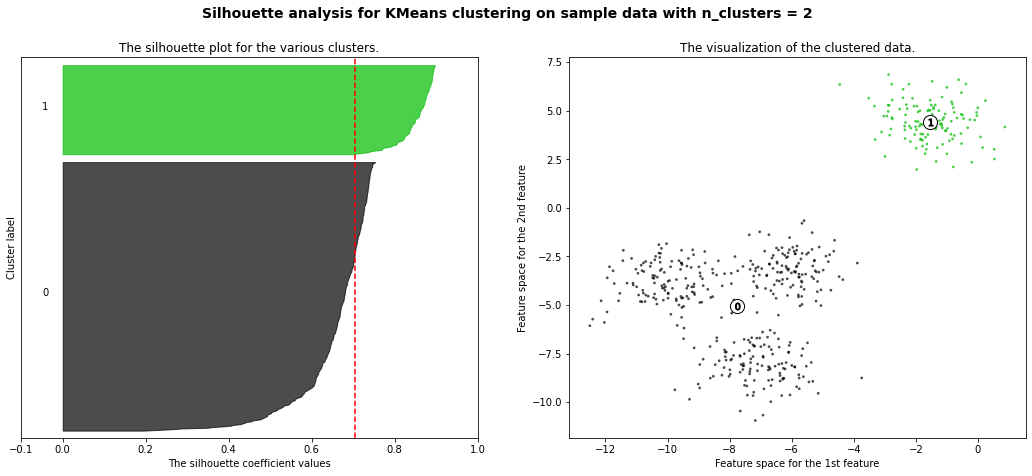

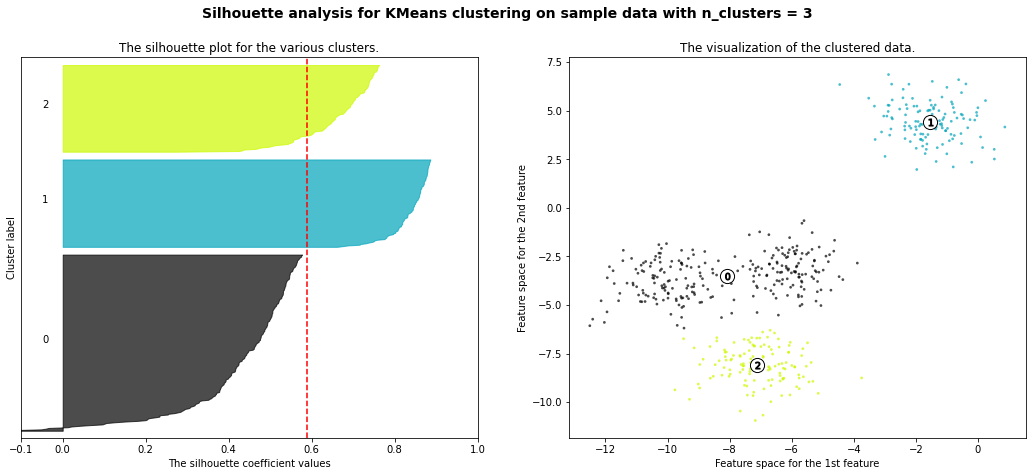

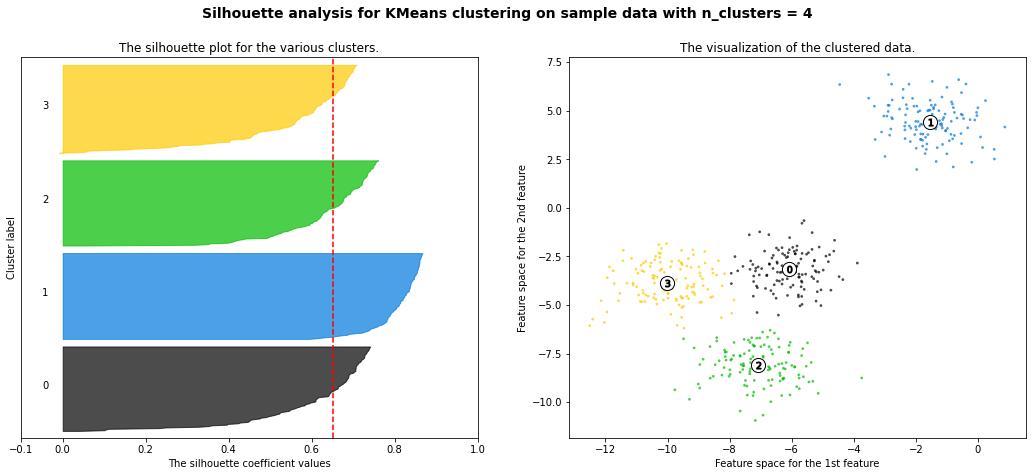

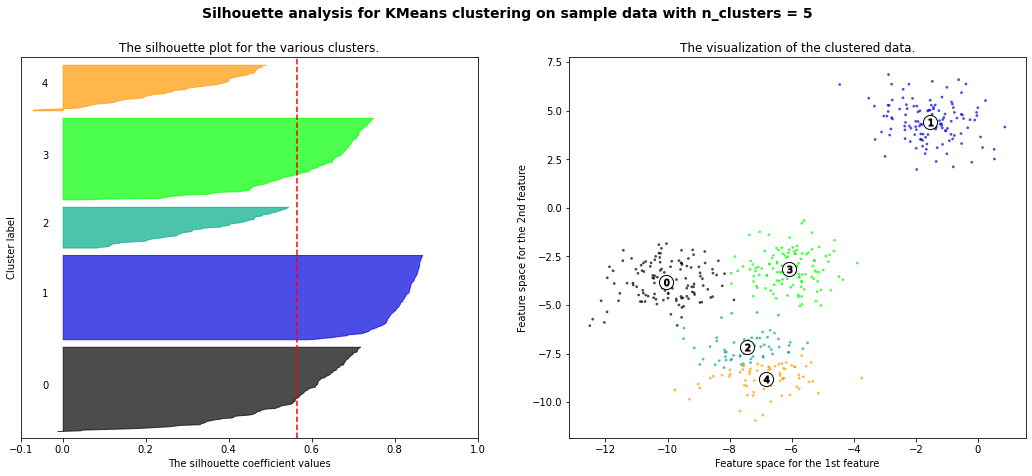

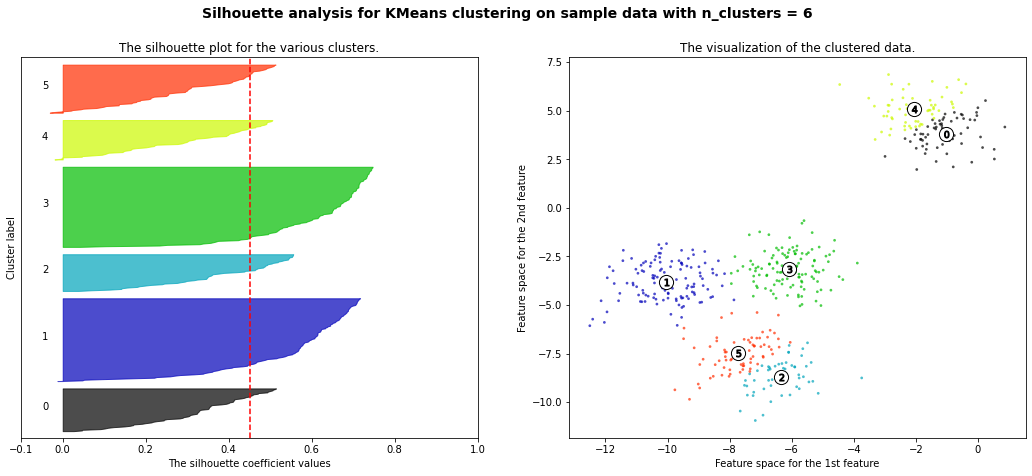

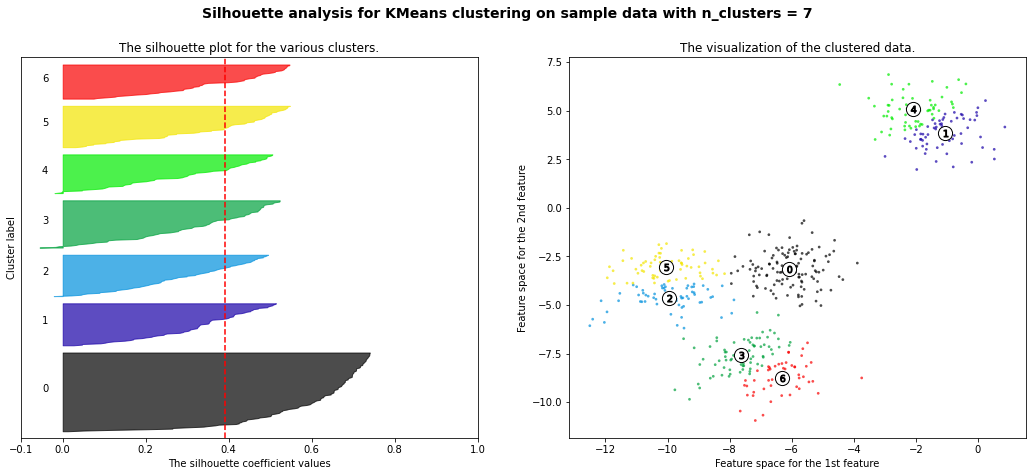

In [189]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [i for i in range(2, 8)]


for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


DBSCAN for different types of data

In [190]:
from sklearn.cluster import DBSCAN

In [191]:
n_samples = 1500
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

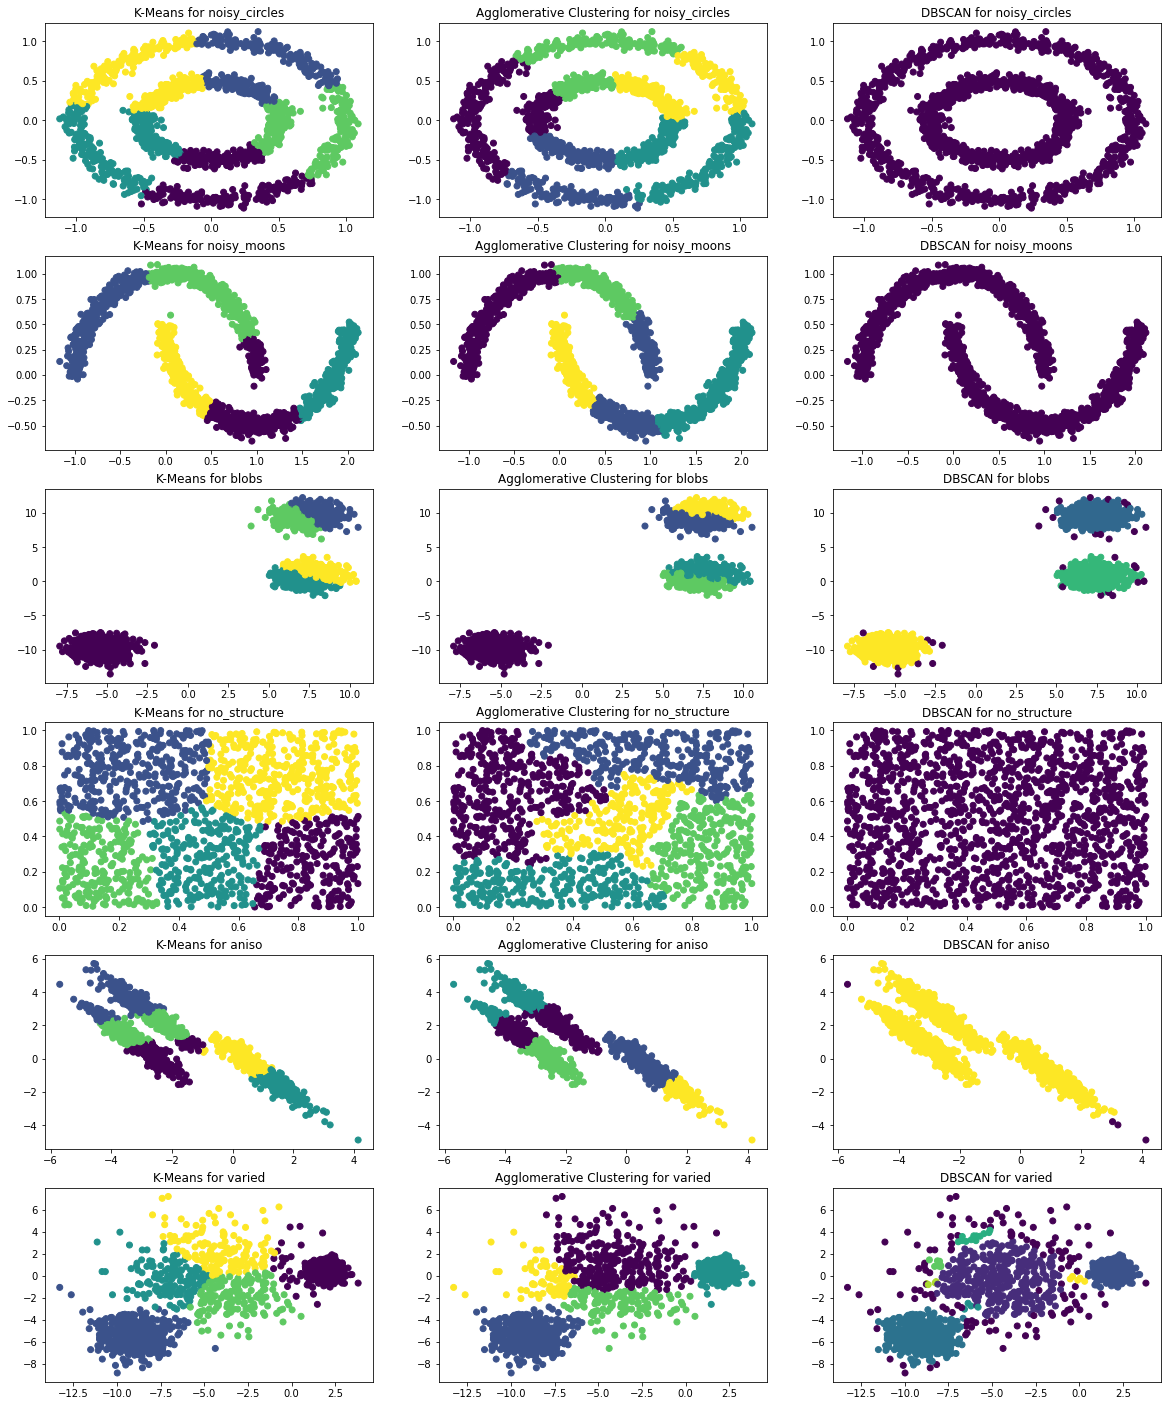

In [192]:
# Anisotropicly distributed data
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

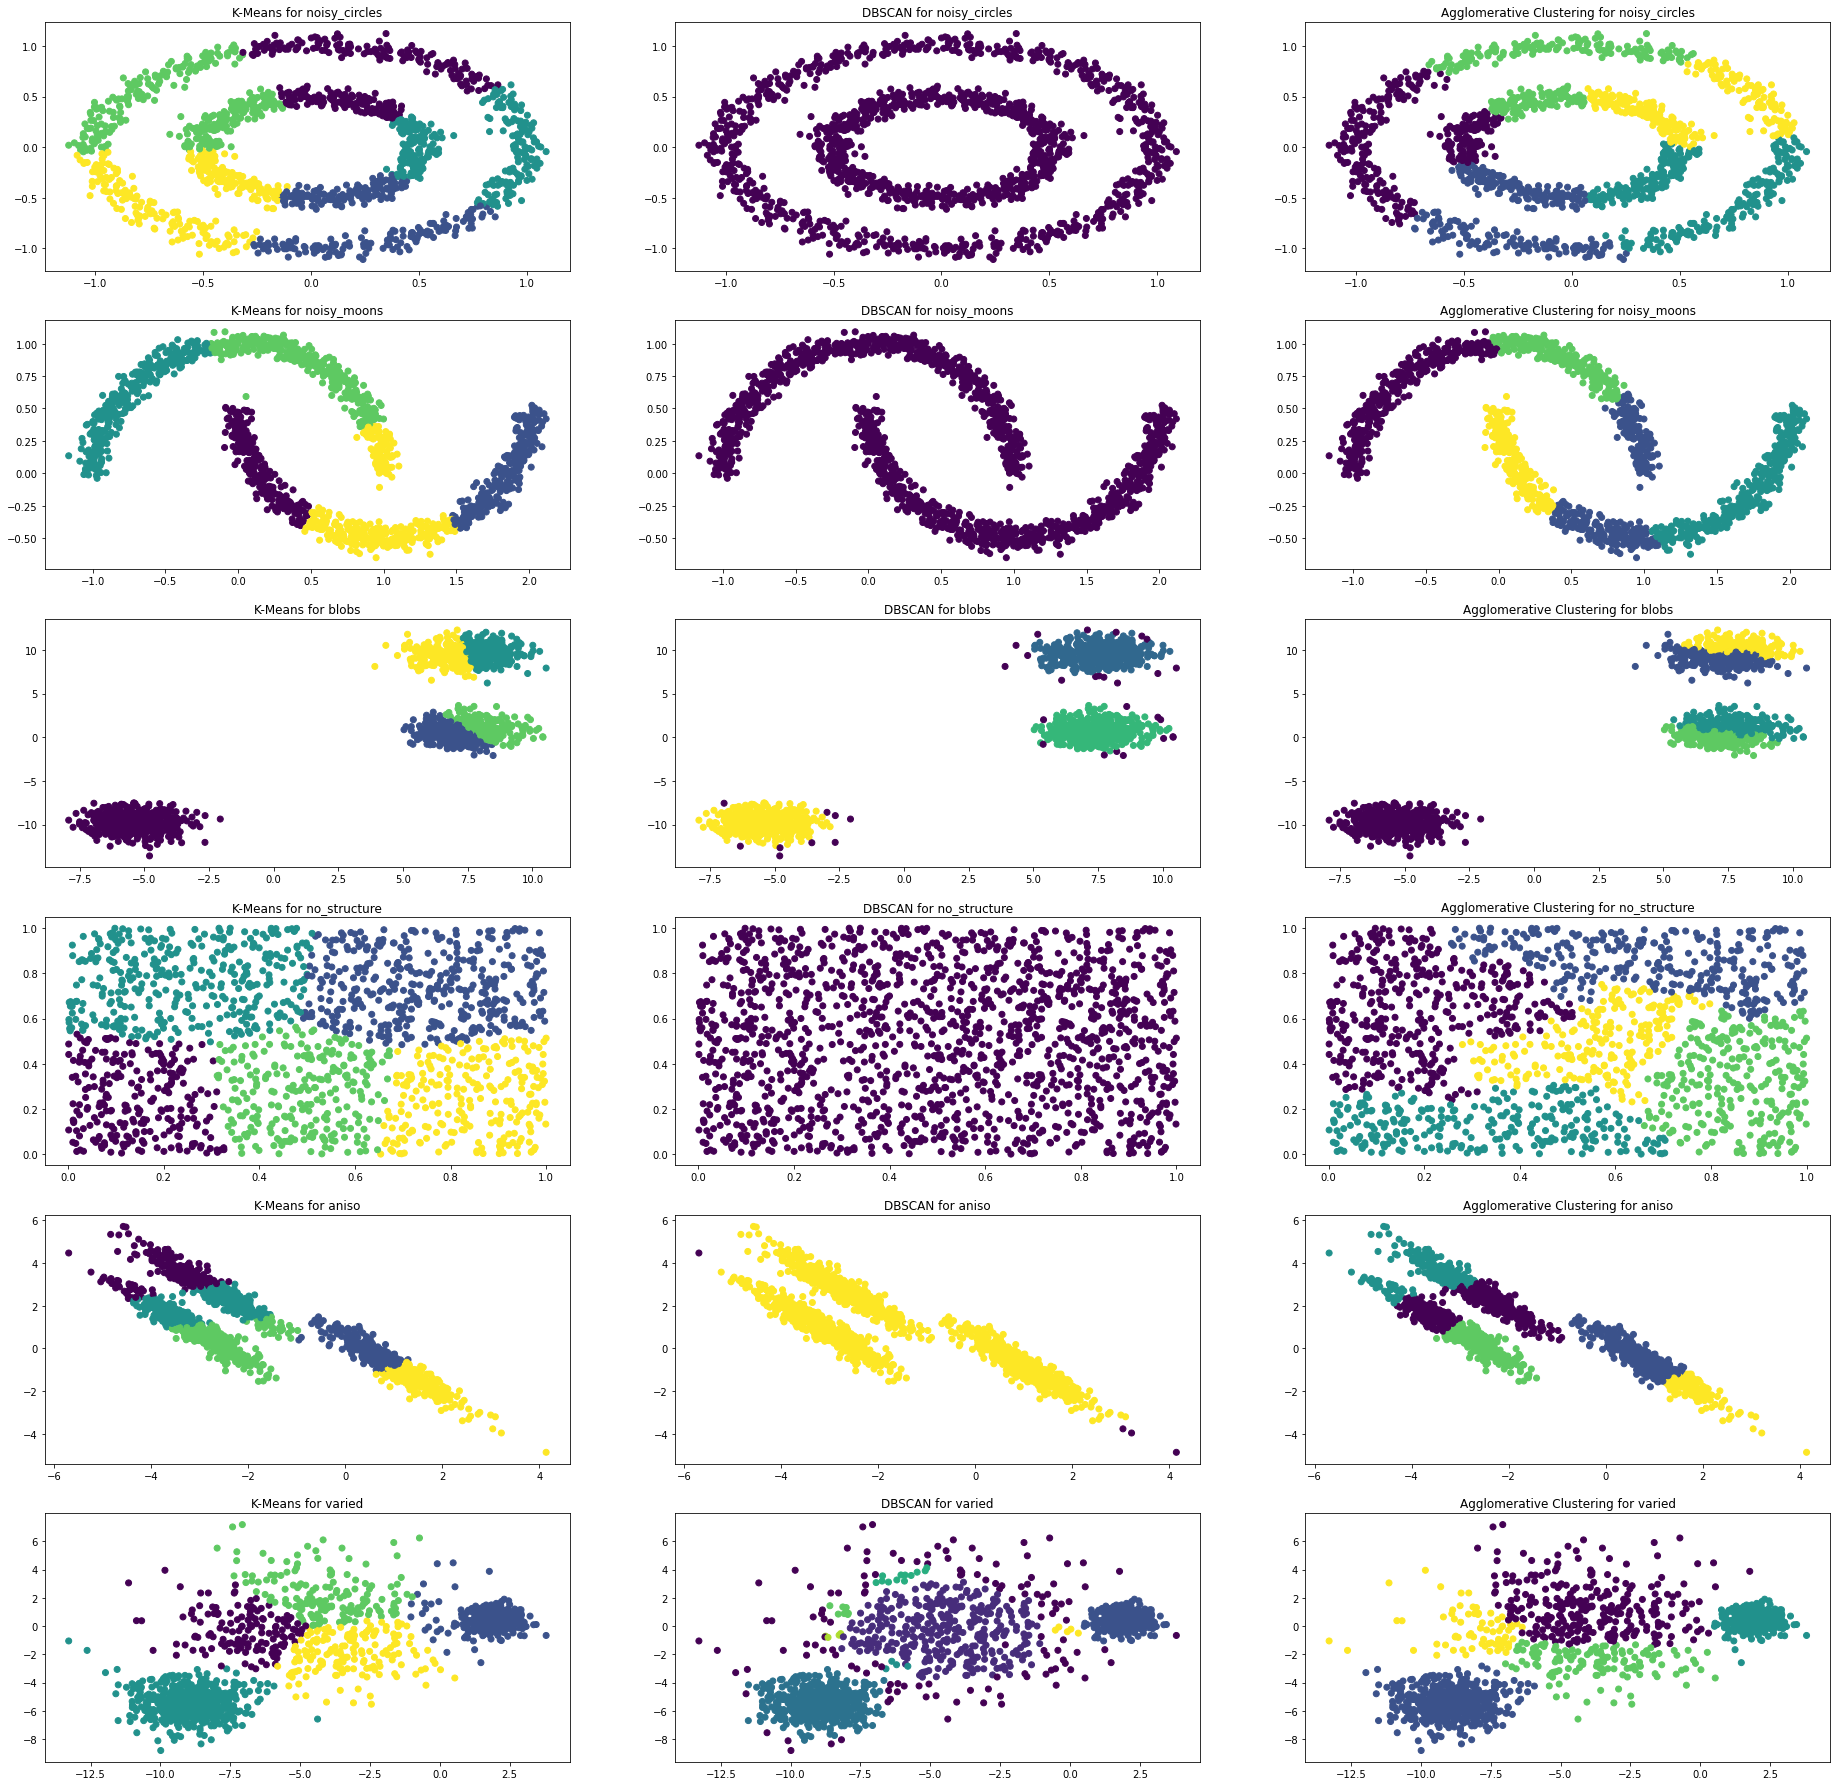

In [196]:
datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
datesets_names = ["noisy_circles", "noisy_moons", "blobs", "no_structure", "aniso", "varied"]


n_plot = 1
dataset_id = 0
plt.figure(figsize=(32, 32))

for dataset in datasets:
    plt.subplot(6, 3, n_plot)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=KMeans(n_clusters=5).fit_predict(dataset[0],
                                                                                       dataset[1]))
    plt.title(f"K-Means for {datesets_names[dataset_id]}")
    n_plot += 1
    

    plt.subplot(6, 3, n_plot)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=DBSCAN().fit_predict(dataset[0],
                                                                           dataset[1]))
    plt.title(f"DBSCAN for {datesets_names[dataset_id]}")

    n_plot += 1

    plt.subplot(6, 3, n_plot)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=AgglomerativeClustering(n_clusters=5).fit_predict(dataset[0], 
                                                                                                        dataset[1]))
    plt.title(f"Agglomerative Clustering for {datesets_names[dataset_id]}")
    
    n_plot += 1
    dataset_id += 1